In [ ]:
%load_ext autoreload
%autoreload 2


from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
torch.cuda.set_device(-1)

import news_utils

import fastai
fastai.__version__

In [13]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels')

In [14]:
data_lm = TextLMDataBunch.load(EX_PA, )

In [15]:
learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_12_00_40_36_447657", device="cuda:2")

In [16]:
news_utils.fastai.predict_next_word(learn=learn, data=data_lm, input_txt='you are a')

("all , xxunk / - a 's xxrep the and . chromosome xxup every to for is as ) on in from ? or have s ( too : that # people an ... can just -- up ! with you had so $ are & only was everything o has even also out about \xa0  now it no \\ made do face will could another .. ; me those e like = i really generation be note grade what â\x80\x93 over not got again if both at xxfld man t day were ' off ever this some carolina any",
 tensor([ 0.7347, -1.2258, -1.7080, -1.8310, -1.8529, -2.3204, -2.4239, -2.5211,
         -2.5765, -2.7173, -2.7381, -2.8114, -3.0429, -3.1431, -3.2505, -3.2831,
         -3.4424, -3.5386, -3.5916, -3.6661, -3.7150, -3.7333, -3.8238, -3.8366,
         -3.8799, -3.9100, -3.9133, -3.9133, -4.0185, -4.0224, -4.0272, -4.0616,
         -4.1195, -4.3357, -4.3493, -4.3868, -4.4187, -4.5348, -4.5505, -4.5692,
         -4.5834, -4.5948, -4.6115, -4.6720, -4.6738, -4.6863, -4.7338, -4.8086,
         -4.8303, -4.8323, -4.8446, -4.8563, -4.8656, -4.9198, -4.9296, -4.9759,
        

In [17]:
def predict(data, model, pred_batch, text:str, n_words:int=1, k=3, tokenizer:Tokenizer=None):
    "Return the `n_words` that come after `text`. `tokenizer` should be the same one used as during training."
    tokenizer = ifnone(tokenizer, Tokenizer())
    tokens = tokenizer.process_all([text])
    ds = data.valid_ds
    ids = ds.vocab.numericalize(tokens[0]) 
    model.reset()
    pbar = master_bar(range(n_words))
    for _ in pbar:
        ds.set_item(ids)
        res = pred_batch(pbar=pbar)
#         ids.append(res[-1].argmax())
        print(res)
        val, ind = torch.topk(res[-1], 2, largest=True)
        ids.append(ind[0])
        ids.append(ind[1])
        
    ds.clear_item()
    return data.train_ds.vocab.textify(ids) 

In [21]:
predict(data_lm, learn.model, learn.pred_batch, 'this is a')

Total time: 00:00



'this is a xxup great'

In [22]:
predict(data_lm, learn.model, learn.pred_batch, 'Build that')

Total time: 00:00



'build that wall house'

In [25]:
predict(data_lm, learn.model, learn.pred_batch, 'Hillary')

Total time: 00:00



'hillary clinton and'

In [7]:
learn.get_preds()

RuntimeError: CUDA error: out of memory

In [ ]:
learn.save_encoder('test')

In [4]:
split_path = Path('~/data/ynacc_proc/replicate/split')

In [59]:
data_clas_train = pd.read_csv(split_path/'train.csv')
data_clas_val = pd.read_csv(split_path/'val.csv')

data_clas_train = data_clas_train[['clsentiment', 'text']]
data_clas_val = data_clas_val[['clsentiment', 'text']]

data_clas_train = data_clas_train.dropna()
data_clas_val = data_clas_val.dropna()

data_clas_train['clsentiment'] = data_clas_train['clsentiment'].astype(int)
data_clas_val['clsentiment'] = data_clas_val['clsentiment'].astype(int)

# data_clas = TextClasDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=64, text_cols=['text'], label_cols=['clsentiment'])

In [60]:
# data_clas_train = pd.read_csv(split_path/'train.csv')
# data_clas_val = pd.read_csv(split_path/'val.csv')

# data_clas_train = data_clas_train[['clsentiment', 'text']]
# data_clas_val = data_clas_val[['clsentiment', 'text']]

# data_clas_train = data_clas_train.dropna()
# data_clas_val = data_clas_val.dropna()

# data_clas_train['clsentiment'] = data_clas_train['clsentiment'].astype(int)
# data_clas_val['clsentiment'] = data_clas_val['clsentiment'].astype(int)

data_clas = news_utils.RandomSampler.TextClasDataBunchRandom.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=64, text_cols=['text'], label_cols=['clsentiment'], num_samples=2000)

In [36]:
# data_clas.valid_ds.vocab = data_lm.train_ds.vocab
# data_clas.valid_ds.vocab_size = data_lm.train_ds.vocab_size

# data_clas.train_ds.vocab = data_lm.train_ds.vocab
# data_clas.train_ds.vocab_size = data_lm.train_ds.vocab_size

In [65]:
# news_utils.fastai.one_batch_text(data_clas=data_clas, data_lm=data_lm)

xxfld 1 we are self - aware . we are aware of our own mortality . this awareness of our anticipated death results in death anxiety . resulting in the 7 stages of grief which are , shock , denial , anger , bargaining , depression , testing , and acceptance . our fear of death often results in denial and bargaining , to achieve an imagined immortality . there is a vicious cycle where religious parents indoctrinate children in their belief before the child has the intellect to judge for themselves . the child goes through life believing it , never really questioning whether or not it is true . they are even taught that they will burn in hell for all eternity , if they do dare question . when they grow up they look for a church that confirms what they already believe . this is confirmation bias . they go to a church that stamps their beliefs with a big " thus says the lord ” . once they get that they become closed minded . they become emotionally invested in the belief to the point that th

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpa

In [6]:
len(data_clas.train_ds.vocab.itos)

42539

In [7]:
data_clas.train_ds.classes

[1, 0, 2, 3]

In [8]:
data_clas.valid_ds.vocab_size

42539

In [89]:
learn2 = text_classifier_learner(data_clas, drop_mult=1.5)
learn2.load_encoder('test')
learn2.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Micro()]
learn2.freeze()

In [46]:
learn2.lr_find(start_lr=1e-4, num_it=1000)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [48]:
learn2.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=1000, stop_div=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


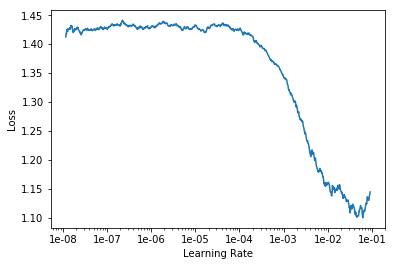

In [49]:
learn2.recorder.plot()

In [90]:
learn2.fit(100, 1e-3)

epoch,train_loss,valid_loss,accuracy,F1_macro,F1_micro
1,1.437227,1.504558,0.122837,0.112827,0.122837
2,1.417290,1.657071,0.096886,0.096627,0.096886
3,1.410124,1.674986,0.077855,0.078042,0.077855
4,1.406181,1.567136,0.077855,0.082385,0.077855
5,1.397406,1.553321,0.083045,0.065336,0.083045
6,1.391121,1.563175,0.060554,0.053167,0.060554
7,1.389454,1.532970,0.102076,0.065025,0.102076
8,1.387251,1.578538,0.086505,0.079827,0.086505


/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/group7/anaconda3/envs/fv1/lib/python3.

KeyboardInterrupt: 